# Analyzing the Popularity and Attitudes of "Fad" Diets
Vinh Tran | Capstone #1 | 5/31/2019 

In [389]:
import json
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
from wit import Wit
import multiprocessing
import numpy as np
import requests
%matplotlib inline
plt.style.use('ggplot')

In [3]:
#Read in data
tweets_data_path = 'twitter_data.txt'

tweets_data = []
words = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [8]:
#make into PD
pd_tweets = pd.DataFrame(tweets_data)

In [12]:
#look at data within USER
pd_users = pd_tweets["user"]
np_users = np.array(pd_users)
pd_users_2 = list(np_users)
pd_users_3 = pd.DataFrame(pd_users_2)
pd_users_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 39 columns):
contributors_enabled                  13000 non-null bool
created_at                            13000 non-null object
default_profile                       13000 non-null bool
default_profile_image                 13000 non-null bool
description                           11028 non-null object
favourites_count                      13000 non-null int64
follow_request_sent                   0 non-null object
followers_count                       13000 non-null int64
following                             0 non-null object
friends_count                         13000 non-null int64
geo_enabled                           13000 non-null bool
id                                    13000 non-null int64
id_str                                13000 non-null object
is_translator                         13000 non-null bool
lang                                  0 non-null object
listed_count     

In [362]:
pd_users_3['location'].head()

0    Vancouver             
1    None                  
2    France                
3    Lost in France...     
4    ↓ TRPG프로필, 시날깐목록은 이쪽에→
Name: location, dtype: object

In [363]:
pd_loc = pd_users_3["location"].reset_index()
pd_loc.groupby('location').nunique().sort_values('index', ascending=False).head()

,index,location
location,,
United States,302,1
"London, England",135,1
"Seattle, WA",125,1
"Miami Gardens, Florida",122,1
"Miami,Fl",119,1


In [361]:
pd_names = pd_users_3["screen_name"].reset_index()
pd_names.groupby('screen_name').nunique().sort_values('index', ascending=False).head()
# table.groupby('YEARMONTH').CLIENTCODE.nunique().sort_values(ascending=False)

,index,screen_name
screen_name,,
RandySolares,122,1
fittoservegroup,119,1
EatKetoWithMe,97,1
Stephan70943560,96,1
greekgoesketo,77,1


In [15]:
# Explore PLACE. Only 398 out of 13,000 that have place information.
pd_place = pd_tweets["place"]
pd_place = [i for i in pd_place if i] 
pd_place = pd.DataFrame(list(np.array(pd_place)))
pd_place

,attributes,bounding_box,country,country_code,full_name,id,name,place_type,url
0,{},"{'type': 'Polygon', 'coordinates': [[[31.66272...",Egypt,EG,"Red Sea, Egypt",00d93bc02a473122,Red Sea,admin,https://api.twitter.com/1.1/geo/id/00d93bc02a4...
1,{},"{'type': 'Polygon', 'coordinates': [[[-80.4756...",Bahamas,BS,Bahamas,b631437cf2f16804,Bahamas,country,https://api.twitter.com/1.1/geo/id/b631437cf2f...
2,{},"{'type': 'Polygon', 'coordinates': [[[-124.482...",United States,US,"California, USA",fbd6d2f5a4e4a15e,California,admin,https://api.twitter.com/1.1/geo/id/fbd6d2f5a4e...
3,{},"{'type': 'Polygon', 'coordinates': [[[-2.99635...",United Kingdom,GB,"Staining, England",62c7c9d4a8b87ada,Staining,city,https://api.twitter.com/1.1/geo/id/62c7c9d4a8b...
4,{},"{'type': 'Polygon', 'coordinates': [[[-124.482...",United States,US,"California, USA",fbd6d2f5a4e4a15e,California,admin,https://api.twitter.com/1.1/geo/id/fbd6d2f5a4e...
5,{},"{'type': 'Polygon', 'coordinates': [[[-117.399...",United States,US,"Oceanside, CA",1cf657005480e70e,Oceanside,city,https://api.twitter.com/1.1/geo/id/1cf65700548...
6,{},"{'type': 'Polygon', 'coordinates': [[[-3.00879...",United Kingdom,GB,"Liverpool, England",151b9e91272233d1,Liverpool,city,https://api.twitter.com/1.1/geo/id/151b9e91272...
7,{},"{'type': 'Polygon', 'coordinates': [[[-88.0978...",United States,US,"Indiana, USA",1010ecfa7d3a40f8,Indiana,admin,https://api.twitter.com/1.1/geo/id/1010ecfa7d3...
8,{},"{'type': 'Polygon', 'coordinates': [[[-98.7785...",United States,US,"San Antonio, TX",3df4f427b5a60fea,San Antonio,city,https://api.twitter.com/1.1/geo/id/3df4f427b5a...
9,{},"{'type': 'Polygon', 'coordinates': [[[-1.06504...",United Kingdom,GB,"Reading, England",5028e25dc94f3898,Reading,city,https://api.twitter.com/1.1/geo/id/5028e25dc94...


In [16]:
#exlpore Country
tweets_by_country = pd_place['country'].value_counts().reset_index()
tweets_by_country = tweets_by_country[tweets_by_country['country']>5]
tweets_by_country

,index,country
0,United States,228
1,United Kingdom,35
2,Canada,29
3,España,11
4,Japan,7
5,Malaysia,6
6,México,6
7,Australia,6


In [17]:
# explore Name
tweets_by_placename = pd_place['full_name'].value_counts().reset_index()
tweets_by_placename = tweets_by_placename[tweets_by_placename['full_name']>5]
tweets_by_placename

,index,full_name
0,"Omaha, NE",12
1,"Los Angeles, CA",9
2,"Seattle, WA",8
3,"Saint-Césaire, Québec",7
4,"Toronto, Ontario",7


In [18]:
#explore Languages
tweets_by_lang = pd_tweets['lang'].value_counts().reset_index()
tweets_by_lang = tweets_by_lang[tweets_by_lang['lang']>59]
tweets_by_lang

,index,lang
0,en,9593
1,es,2201
2,und,333
3,ja,173
4,in,155
5,tl,60


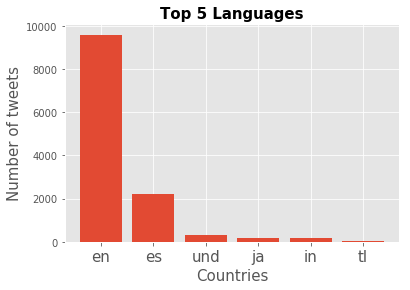

In [460]:
fig, ax = plt.subplots()
ax.bar(tweets_by_lang['index'], tweets_by_lang['lang'])
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 Languages', fontsize=15, fontweight='bold')
fig.savefig('images/top5languages.png')

In [20]:
# Only include data in english, now 9,593 entries from 13,000
pd_tweets_en = pd_tweets[pd_tweets['lang'] == 'en']

In [390]:
import re

In [22]:
# function to search for words in a tweet
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [23]:
# function to create a new column in the dataframe with keyword mentions
def keyword_column_boolean(df, keyword_list):
    for x in keyword_list:
        df[x] = df['text'].apply(lambda text: word_in_text(x,text))

In [24]:
def count_of_keywords(df, keyword_list):
    count = []
    for x in keyword_list:
        count.append((pd_tweets_en[x].value_counts()[True]))
    return count

In [29]:
def count_of_keywords_by(df, keyword, diet_list):
    pd_tweets_en[keyword] = pd_tweets_en['text'].apply(lambda text: word_in_text(keyword, text))
    count_list = []
    for x in diet_list:
        count_list.append( pd_tweets_en[pd_tweets_en[keyword] == True][x].value_counts()[True])
    return count_list

In [25]:
diet_list = ['keto', 'paleo','glutenfree','whole30','lowfat','mediterraneandiet']
keyword_column_boolean(pd_tweets_en, diet_list)
count_list = count_of_keywords(pd_tweets_en, diet_list)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


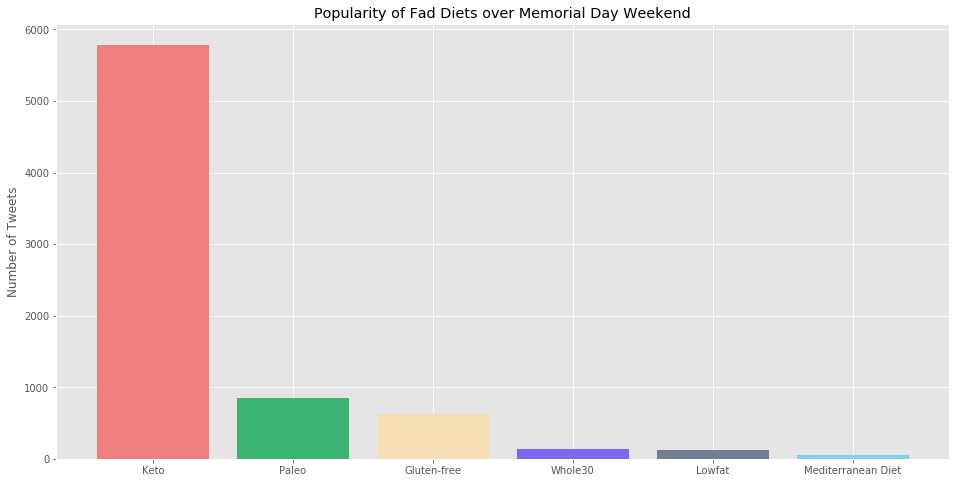

In [360]:
# Plot popularity of diets (number of mentions in a tweet)
diet_label = ['Keto', 'Paleo', 'Gluten-free', 'Whole30',  'Lowfat', 'Mediterranean Diet']

x_pos = list(range(len(count_list)))
fig, ax = plt.subplots(figsize = (16,8))
plt.bar(diet_label, count_list, color=['lightcoral', 'mediumseagreen', 'wheat', 'mediumslateblue', 'slategray','skyblue'])
ax.set_xticklabels(diet_label)
ax.set_title('Popularity of Fad Diets over Memorial Day Weekend')
ax.set_ylabel('Number of Tweets')
fig.savefig('images/Popularity_of_fad_diets.png')

In [27]:
# using lost as a proxy for a diet causing someone to lose weight
pd_tweets_en['lost'] = pd_tweets_en['text'].apply(lambda text: word_in_text('lost', text))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
# read tweets with "lost" in it for weight loss - a proxy of how successful it is
pd_tweets_en[pd_tweets_en['lost'] == True].text

3        @Cornishview I lost a 42lbs last year on keto,...
44       @Alshline @GaleTheRoo I have just started keto...
82       @LW_GMM_SPN I ate keto and I lost a bunch of w...
83       Been on Keto for a week and I lost two pounds ...
176      @libertytarian @CrossFit Wish your protein bar...
230      The real measure of our wealth is how much we'...
291      @maydaymindy9 I’ve never done keto, but I lost...
326      @maydaymindy9 @jo_kate7 I’ve been Keto for 18 ...
372      RT @maydaymindy9: Today is exactly 2 months th...
389      RT @maydaymindy9: Today is exactly 2 months th...
407      omg it has been a YEAR since i switched up my ...
430      RT @maydaymindy9: Today is exactly 2 months th...
433      RT @maydaymindy9: Today is exactly 2 months th...
458      RT @maydaymindy9: Today is exactly 2 months th...
528      RT @maydaymindy9: Today is exactly 2 months th...
532      Never heard of Keto. But I went on a diet for ...
540      @maydaymindy9 I lost 123lb on keto over 4 year.

In [30]:
#Keyword = Start
diet_list = ['keto','paleo','whole30', 'glutenfree'] #no mention of 'start' in lowfat or med diet
start_count_list = count_of_keywords_by(pd_tweets_en, 'start', diet_list)
start_count_list

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[324, 39, 18, 3]

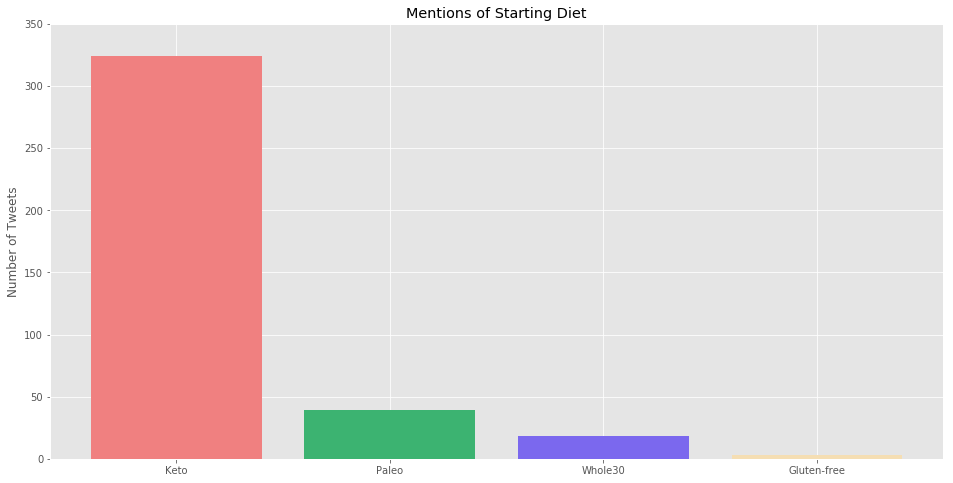

In [364]:
# Plot people who started diets (number of mentions in a tweet)
diet_label = ['Keto', 'Paleo', 'Whole30', 'Gluten-free']

x_pos = list(range(len(start_count_list)))
fig, ax = plt.subplots(figsize = (16,8))
plt.bar(diet_label, start_count_list, color=['lightcoral', 'mediumseagreen', 'mediumslateblue', 'wheat'])

ax.set_ylim((0,350))
ax.set_xticklabels(diet_label)
ax.set_title('Mentions of Starting Diet')
ax.set_ylabel('Number of Tweets')
fig.savefig('images/Start_fad_diet.png')

In [32]:
#Keyword = Lost
diet_list = ['keto', 'paleo','whole30'] #no mention of 'lost' in glutenfree, lowfat, med
lost_count_list = count_of_keywords_by(pd_tweets_en, 'lost', diet_list)
lost_count_list

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[170, 7, 1]

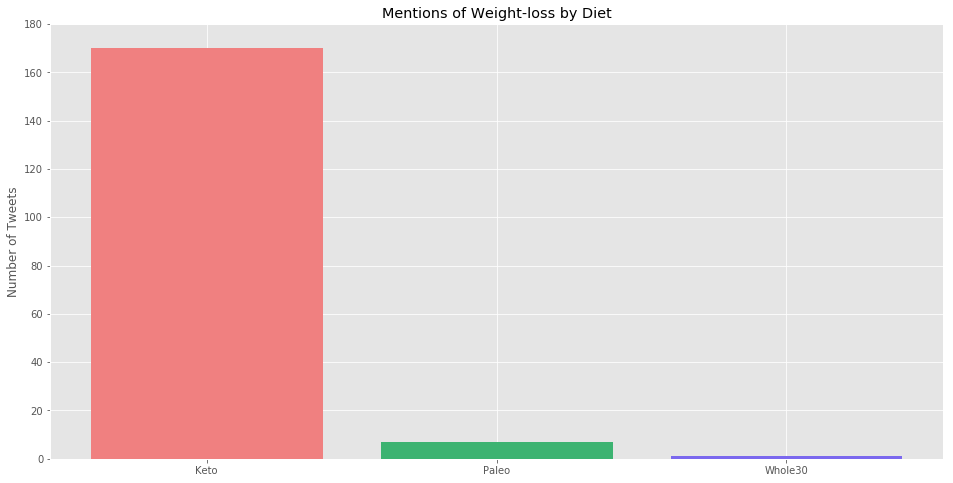

In [366]:
# Plot popularity of diets (number of mentions in a tweet)
diet_label = ['Keto', 'Paleo', 'Whole30']

x_pos = list(range(len(lost_count_list)))
fig, ax = plt.subplots(figsize = (16,8))
plt.bar(diet_label, lost_count_list, color=['lightcoral', 'mediumseagreen','mediumslateblue'])

ax.set_ylim((0,180))
ax.set_xticklabels(diet_label)
ax.set_title('Mentions of Weight-loss by Diet')
ax.set_ylabel('Number of Tweets')

fig.savefig('images/Weight_loss_by_fad_diet.png')

In [34]:
#Keyword = RT
diet_list = ['keto', 'paleo','glutenfree','lowfat','mediterraneandiet', 'whole30'] 
rt_count_list = count_of_keywords_by(pd_tweets_en, 'RT', diet_list)
rt_count_list

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[2189, 369, 263, 120, 38, 37]

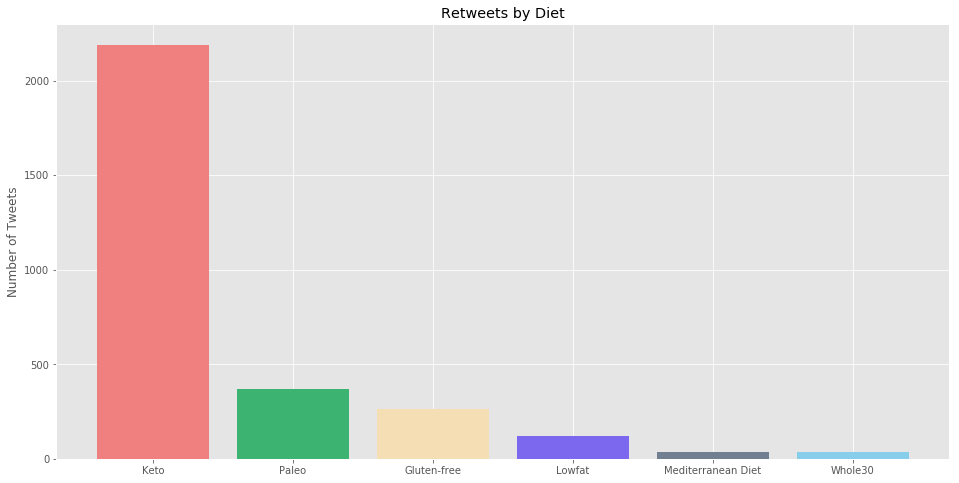

In [369]:
# Plot people who retweeted diets (number of mentions in a tweet)
diet_label = ['Keto', 'Paleo', 'Gluten-free', 'Lowfat', 'Mediterranean Diet', 'Whole30',]

x_pos = list(range(len(rt_count_list)))
fig, ax = plt.subplots(figsize = (16,8))
plt.bar(diet_label, rt_count_list, color=['lightcoral', 'mediumseagreen', 'wheat', 'mediumslateblue', 'slategray', 'skyblue'])

ax.set_ylim((0,2300))
ax.set_xticklabels(diet_label)
ax.set_title('Retweets by Diet')
ax.set_ylabel('Number of Tweets')
fig.savefig('images/Retweet_fad_diet.png')

In [36]:
def count_of_keywords_by_false(df, keyword, diet_list):
    pd_tweets_en[keyword] = pd_tweets_en['text'].apply(lambda text: word_in_text(keyword, text))
    count_list = []
    for x in diet_list:
        count_list.append( pd_tweets_en[pd_tweets_en[keyword] == False][x].value_counts()[True])
    return count_list

In [37]:
#Keyword = not RT - capturing original tweets
diet_list = ['keto', 'paleo','glutenfree','whole30','mediterraneandiet', 'lowfat'] 
rt_false_count_list = count_of_keywords_by_false(pd_tweets_en, 'RT', diet_list)
rt_false_count_list

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[3598, 483, 366, 98, 13, 6]

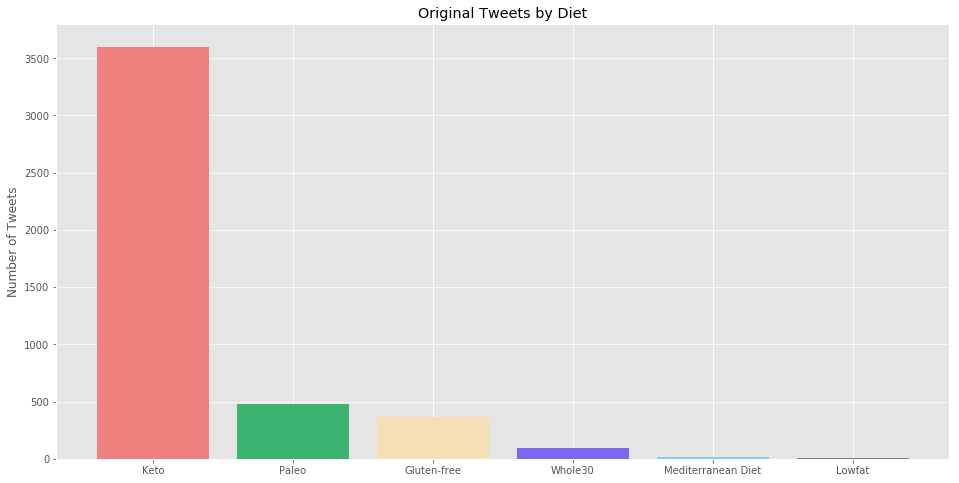

In [371]:
# Plot people who sent original tweets of diets (number of mentions in a tweet)
diet_label = ['Keto', 'Paleo', 'Gluten-free', 'Whole30', 'Mediterranean Diet', 'Lowfat' ]

x_pos = list(range(len(rt_false_count_list)))
fig, ax = plt.subplots(figsize = (16,8))
plt.bar(diet_label, rt_false_count_list, color=['lightcoral', 'mediumseagreen', 'wheat', 'mediumslateblue', 'skyblue','slategray'])

ax.set_ylim((0,3800))
ax.set_xticklabels(diet_label)
ax.set_title('Original Tweets by Diet')
ax.set_ylabel('Number of Tweets')
fig.savefig('images/Original_tweet_fad_diet.png')

In [39]:
# Create pd with just text for english tweets and examine
pd_text = pd_tweets_en[["id","text"]]
pd.set_option('display.max_colwidth', -1)
pd_text

,id,text
0,1132719352187195392,RT @TuSoonShakur: GNC CLERK: you on the paleo diet?\nALBINO: not funny
2,1132719428502720513,New Edition of My West Indian Diaspora. https://t.co/XM6pmekz4N Stories via @KellyKatharin @Yana_Yz @Chookooloonks #keto #travelblog
3,1132719439114395648,"@Cornishview I lost a 42lbs last year on keto, and 6"" off my waist\nMy bloods went entirely back to normal, my blood… https://t.co/v7VYjbFK8C"
4,1132719510241259520,"RT @AncientIrismon: After a pun on this week's With the Will podcast, I made Joe Keto bread! https://t.co/Xhb9Oj48S7"
6,1132719555141181440,@superbirdman1 @MikhailaAleksis @kevinnbass @ProfTimNoakes Bass isnt wrong. He's objective.. which is way more than… https://t.co/WnT41Lx0ug
7,1132719562074611712,"Might be late to the party... but @KashiFoods has these superfood beet, berry and quinoa waffles... AHMAZING.… https://t.co/pIcQzY6LOP"
9,1132719609562456064,RT @PrettyDressGirl: Every time I visit an @nationaltrust property I go hungry. Please do better at providing #glutenfree options.
10,1132719660783288321,SBD • space between diet \n\ncertified organic \nno wheat products \nno soy products \nno peanut products \nno coffee bea… https://t.co/bK1LvG4Ypr
12,1132719670245646336,Sunday Keto Dinner...\nCumin and Cinnamon Spiced Cauliflower rice with Chicken Curry and Full fat Yoghurt..\nSo filli… https://t.co/Bk8CXJDrs3
13,1132719675568214016,@bistoblue @City_Chief @Footy_Headlines Won’t fit us fat fuckers . Keto anyone ?


---











### Sentiment Analysis

In [372]:
#remove handles beginning with @...right now this is just moving @
def remove_handles(text):
    text = text.lower()
    remove = re.sub('@','', text)
    return remove

#pd_text_dedup['text'].apply(lambda text: remove_handles(text))

In [40]:
#Exclude re-tweets

pd_tweets_en_original =  pd_tweets_en[pd_tweets_en['RT'] == False]
    # 5683 original tweets

In [41]:
#De-duplicate file based on tweets

pd_tweets_dedup = pd_tweets_en_original.drop_duplicates(subset = 'text') 
    # 5674 de-duped

# Only keep id and text
pd_text_dedup = pd_tweets_dedup[['id','text']]

# Create an output file that has a tweet per line with ID separated by a comma and the tweet in quotes
pd_text_dedup.to_csv(r'tweet_diet_sentiment.csv', index = False)

In [111]:
tweet_diet_sentiment = pd.read_csv("tweet_diet_sentiment.csv",index_col=0,header=None)[1]
tweet_diet_sentiment = tweet_diet_sentiment.iloc[3:].astype(str)
idxs = list(tweet_diet_sentiment.index)

In [102]:
# Test on one tweet
# tweet_diet_sentiment = pd.read_csv("tweet_diet_sentiment_test.csv",index_col=0,header=None)[1]
# tweet_diet_sentiment = tweet_diet_sentiment.iloc[3:].astype(str)
# idxs = list(tweet_diet_sentiment.index)

In [116]:
access_token='TPGKFHFWL6UWQ2MNBTX7LBVKZP4FNYWN'
client = Wit(access_token)

sentments = {}

test = tweet_diet_sentiment#.iloc[:10]

def sent_one_message(idx):
    b = tweet_diet_sentiment.loc[idx]
    try:
        res = client.message(b)#['entities']
        return [idx,res]
    
    except Exception:
        pass
    

pool_size = 6
pool = multiprocessing.Pool(pool_size)

In [117]:
#Run WIT.AI sentiment analysis. WARNING THIS STEP TAKES A LONG TIME
test = pool.map(sent_one_message, idxs)

In [289]:
# remove where None
test2= [a for a in test if a != None]

In [120]:
# create a dataframe
first_quest = pd.DataFrame(test2).set_index(0)

In [122]:
#output to CSV
first_quest.to_csv("outputs/tweet_diet_sentiment_result.csv")

In [123]:
first_quest[1].apply(lambda x : x['entities'])

0
1132719428502720513    {'sentiment': [{'confidence': 0.77479595872719, 'value': 'neutral'}]} 
1132719439114395648    {}                                                                    
1132719555141181440    {'sentiment': [{'confidence': 0.53079379592437, 'value': 'neutral'}]} 
1132719675568214016    {'sentiment': [{'confidence': 0.72580576846991, 'value': 'negative'}]}
1132719713442832385    {'sentiment': [{'confidence': 0.84714316921389, 'value': 'positive'}]}
1132719780551680005    {}                                                                    
1132719800730308609    {'sentiment': [{'confidence': 0.90502744762385, 'value': 'positive'}]}
1132719806485024774    {'sentiment': [{'confidence': 0.89197695601037, 'value': 'positive'}]}
1132719827167191045    {'sentiment': [{'confidence': 0.67985737542369, 'value': 'neutral'}]} 
1132719861224890368    {'sentiment': [{'confidence': 0.78667742606248, 'value': 'neutral'}]} 
1132719902505263107    {'sentiment': [{'confidence': 0.770

In [124]:
first_quest[2] = first_quest[1].apply(lambda x : x['entities'])
first_quest2 = first_quest[first_quest[2] != {}]
first_quest2["confidence"] = first_quest2[2].apply(lambda x : x['sentiment'][0]['confidence'])
first_quest2['value'] = first_quest2[2].apply(lambda x : x['sentiment'][0]['value'])
first_quest2['text'] = first_quest2[1].apply(lambda x: x['_text'])# = 

first_quest2 = first_quest2[['text','confidence','value']]
first_quest2.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,text,confidence,value
0,,,
1132719428502720513,New Edition of My West Indian Diaspora. https://t.co/XM6pmekz4N Stories via @KellyKatharin @Yana_Yz @Chookooloonks #keto #travelblog,0.774796,neutral
1132719555141181440,@superbirdman1 @MikhailaAleksis @kevinnbass @ProfTimNoakes Bass isnt wrong. He's objective.. which is way more than… https://t.co/WnT41Lx0ug,0.530794,neutral
1132719675568214016,@bistoblue @City_Chief @Footy_Headlines Won’t fit us fat fuckers . Keto anyone ?,0.725806,negative
1132719713442832385,@boozychef @vashtiroebuck1 Giddy up! I’ve been trying to make the perfect #keto wedge for like 4-years 😂,0.847143,positive
1132719800730308609,https://t.co/Xs2DFoWlcB \nProud of myself today! First pool workout in a long time. Keto journey continues with low… https://t.co/T0vNYMCEtZ,0.905027,positive


In [125]:
diet_list = ['keto', 'paleo','glutenfree','whole30','lowfat','mediterraneandiet']
keyword_column_boolean(first_quest2, diet_list)

In [290]:
first_quest2.head(1)

,text,confidence,value,keto,paleo,glutenfree,whole30,lowfat,mediterraneandiet
0,,,,,,,,,
1132719428502720513,New Edition of My West Indian Diaspora. https://t.co/XM6pmekz4N Stories via @KellyKatharin @Yana_Yz @Chookooloonks #keto #travelblog,0.774796,neutral,True,False,False,False,False,False


In [547]:
#Create a bunch of different dataframes as part of EDA
df_keto = first_quest2[first_quest2["keto"] == True]
df_paleo = first_quest2[first_quest2["paleo"] == True]
df_glutenfree = first_quest2[first_quest2["glutenfree"] == True]
df_whole30 = first_quest2[first_quest2["whole30"] == True]
df_lowfat = first_quest2[first_quest2["lowfat"] == True]
df_med = first_quest2[first_quest2["mediterraneandiet"] == True]

# not keto
df_notketo = first_quest2[first_quest2["keto"] == False]

# not glutenfree
df_notglutenfree = first_quest2[first_quest2["glutenfree"] == False]

# only keep positive tweets for keto vs other diets. Test 1 - Positive Keto tweets are more confidently positive
df_keto_positive = df_keto[df_keto['value']== 'positive']
df_notketo_positive = df_notketo[df_notketo['value']== 'positive']

# Test 2 - Positive tweets more confident than negative tweets
df_positive = first_quest2[first_quest2['value']== 'positive']
df_negative = first_quest2[first_quest2['value']== 'negative']
df_neutral = first_quest2[first_quest2['value']== 'neutral']

### create a histogram of number of tweets by value (positive/negative/neutral) for each diet

In [300]:
sentiment_count_paleo = [len(df_paleo[df_paleo["value"] == "positive"]), len(df_paleo[df_paleo["value"] == "negative"]), len(df_paleo[df_paleo["value"] == "neutral"])]
sentiment_count_keto = [len(df_keto[df_keto["value"] == "positive"]), len(df_keto[df_keto["value"] == "negative"]), len(df_keto[df_keto["value"] == "neutral"])]
sentiment_count_glutenfree = [len(df_glutenfree[df_glutenfree["value"] == "positive"]), len(df_glutenfree[df_glutenfree["value"] == "negative"]), len(df_glutenfree[df_glutenfree["value"] == "neutral"])]
sentiment_count_whole30 = [len(df_whole30[df_whole30["value"] == "positive"]), len(df_whole30[df_whole30["value"] == "negative"]), len(df_whole30[df_whole30["value"] == "neutral"])]
sentiment_count_lowfat = [len(df_lowfat[df_lowfat["value"] == "positive"]), len(df_lowfat[df_lowfat["value"] == "negative"]), len(df_lowfat[df_lowfat["value"] == "neutral"])]
sentiment_count_med = [len(df_med[df_med["value"] == "positive"]), len(df_med[df_med["value"] == "negative"]), len(df_med[df_med["value"] == "neutral"])]

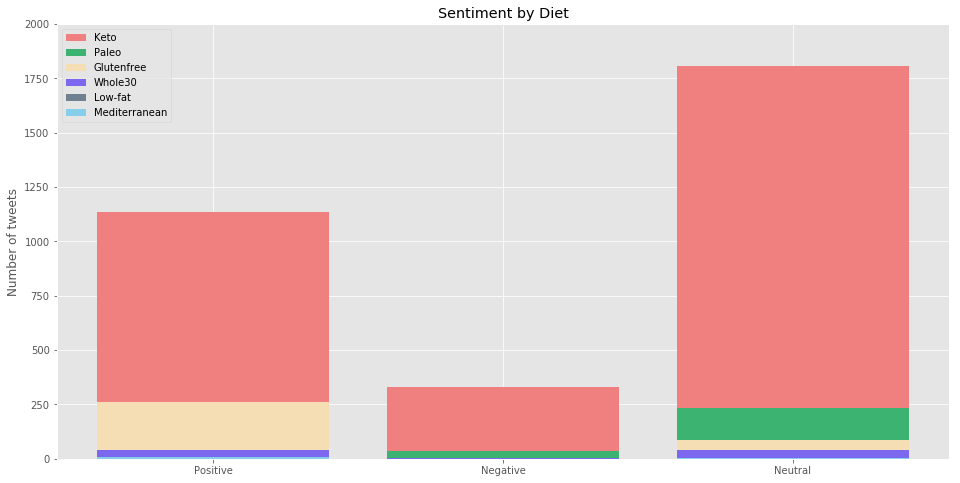

In [375]:
# Plot people who sent original tweets of diets (number of mentions in a tweet)
emot_label = ['Positive', 'Negative', 'Neutral' ]

x_pos = list(range(len(sentiment_count)))
fig, ax = plt.subplots(figsize = (16,8))
plt.bar(emot_label, sentiment_count_keto, label = "Keto", color = "lightcoral")
plt.bar(emot_label, sentiment_count_paleo,  label = 'Paleo', color = 'mediumseagreen')
plt.bar(emot_label, sentiment_count_glutenfree,  label = 'Glutenfree', color = 'wheat')
plt.bar(emot_label, sentiment_count_whole30,  label = 'Whole30', color = 'mediumslateblue')
plt.bar(emot_label, sentiment_count_lowfat,  label = 'Low-fat', color = 'slategray')
plt.bar(emot_label, sentiment_count_med,  label = 'Mediterranean', color = 'skyblue')

ax.set_ylim((0,2000))
ax.set_xticklabels(emot_label)
ax.set_title('Sentiment by Diet')
ax.set_ylabel('Number of tweets')
ax.legend()
fig.savefig('images/Keto_diet_sentiment.png')

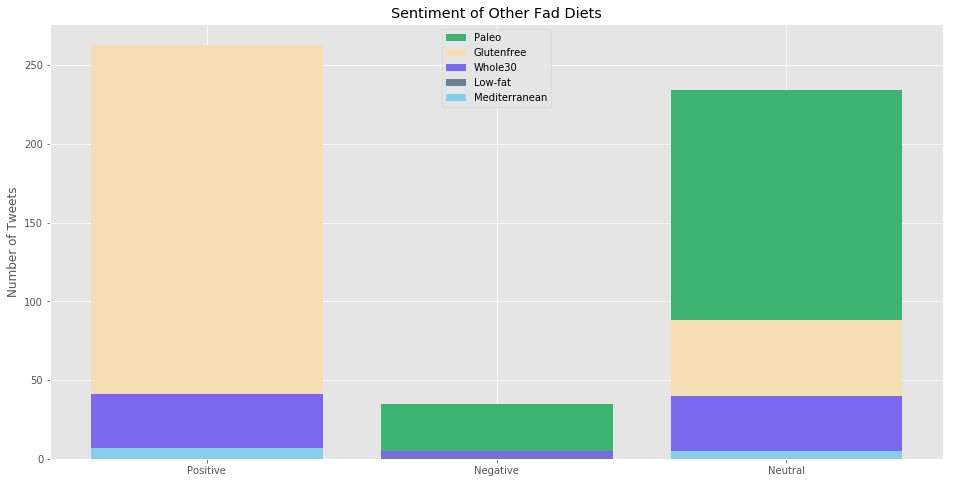

In [376]:
emot_label = ['Positive', 'Negative', 'Neutral' ]

x_pos = list(range(len(sentiment_count)))
fig, ax = plt.subplots(figsize = (16,8))
plt.bar(emot_label, sentiment_count_paleo, label = 'Paleo', color = "mediumseagreen")
plt.bar(emot_label, sentiment_count_glutenfree, label = 'Glutenfree', color = "wheat")
plt.bar(emot_label, sentiment_count_whole30, label = 'Whole30', color = "mediumslateblue")
plt.bar(emot_label, sentiment_count_lowfat, label = 'Low-fat', color = 'slategray')
plt.bar(emot_label, sentiment_count_med, label = 'Mediterranean', color = "skyblue")
ax.set_title('Sentiment of Other Fad Diets')
ax.set_ylabel('Number of Tweets')
ax.legend()
fig.savefig('images/Other_diet_sentiment.png')

In [153]:
df_keto.groupby("value").nunique()["text"]

value
negative    330 
neutral     1805
positive    1134
Name: text, dtype: int64

In [288]:
df_paleo.groupby("value").nunique()["text"]

(value
 negative    35 
 neutral     234
 positive    182
 Name: text, dtype: int64, value
 negative    1  
 neutral     88 
 positive    263
 Name: text, dtype: int64)

In [146]:
df_glutenfree.groupby("value").nunique()["text"]

value
negative    1  
neutral     88 
positive    263
Name: text, dtype: int64

In [147]:
df_whole30.groupby("value").nunique()["text"]

value
negative    5 
neutral     40
positive    41
Name: text, dtype: int64

In [148]:
df_lowfat.groupby("value").nunique()["text"]

value
negative    1
neutral     4
Name: text, dtype: int64

In [149]:
df_med.groupby("value").nunique()["text"]

value
neutral     5
positive    7
Name: text, dtype: int64

In [306]:
#Create lists to pass through plots
#keto 3269 vs. other 1914 
keto_confidence = list(df_keto['confidence'])
notketo_confidence = list(df_notketo['confidence'])

#keto positive 1134 vs. not keto positive 1055
keto_p_confidence = list(df_keto_positive['confidence'])
notketo_p_confidence = list(df_notketo_positive['confidence'])

#positive 2189 vs. negative 459 (no more neutral)
negative_confidence = list(df_negative['confidence'])
positive_confidence = list(df_positive['confidence'])

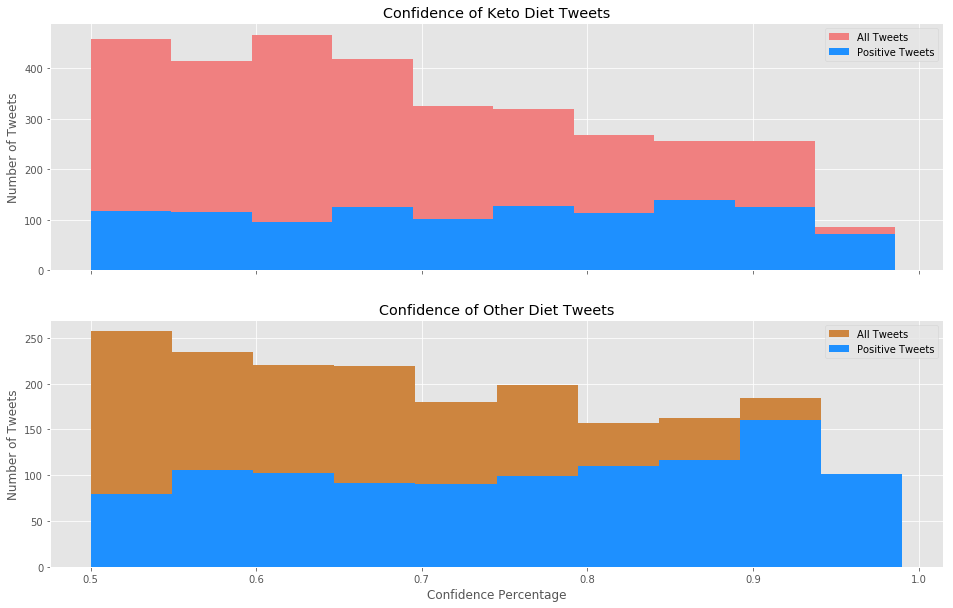

In [449]:
#Histogram of Keto vs Other Diet confidence
fix, ax = plt.subplots(2, figsize=(16,10), sharex = True)

ax[0].hist(keto_confidence, label = 'All Tweets', color = 'lightcoral')
ax[0].hist(keto_p_confidence, label = 'Positive Tweets', color = "dodgerblue")
ax[0].set_title('Confidence of Keto Diet Tweets')
ax[0].set_ylabel('Number of Tweets')
ax[0].legend()


ax[1].hist(notketo_confidence, label = 'All Tweets', color = "peru")
ax[1].hist(notketo_p_confidence, label = 'Positive Tweets', color = "dodgerblue")
ax[1].set_title('Confidence of Other Diet Tweets')
ax[1].set_ylabel('Number of Tweets')
ax[1].set_xlabel('Confidence Percentage')
ax[1].legend()
fig.savefig('images/Confidence_of_Diet_Keto.png')

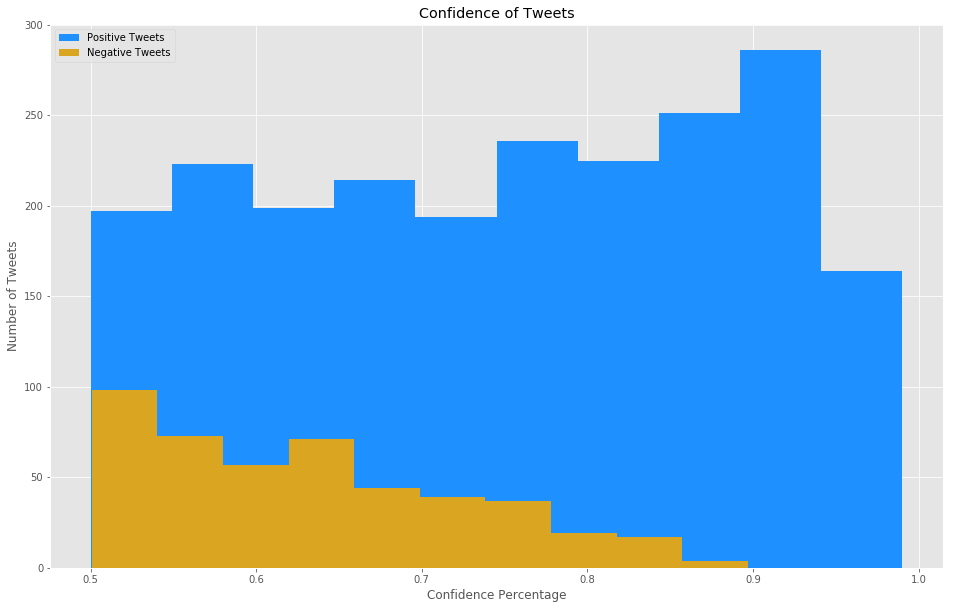

In [384]:
#Histogram of Positive vs Negative confidence
fix, ax = plt.subplots(1, figsize=(16,10))

ax.hist(positive_confidence, label = 'Positive Tweets', color = 'dodgerblue')
ax.hist(negative_confidence, label = 'Negative Tweets', color = 'goldenrod')
ax.set_title('Confidence of Tweets')
ax.set_ylabel('Number of Tweets')
ax.set_xlabel('Confidence Percentage')
ax.legend()
fig.savefig('images/Confidence_of_Diet_NegPos.png')

In [451]:
np.mean(keto_confidence), np.mean(notketo_confidence)

(0.6980262929480127, 0.7162297880087789)

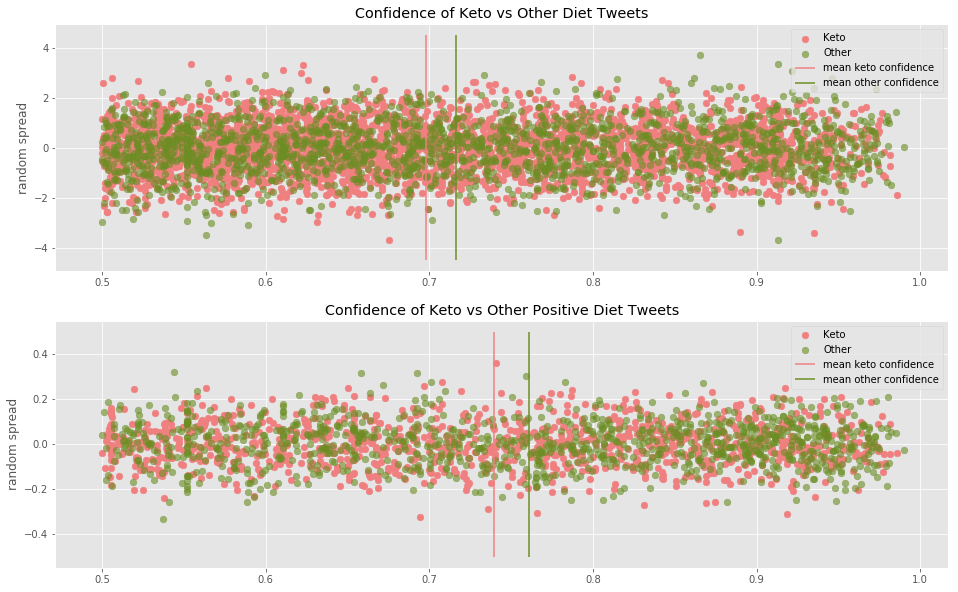

In [450]:
#Histogram of confidence for Keto vs Other, and Keto positive vs Other Positive
fix, ax = plt.subplots(2, figsize=(16,10))

ax[0].scatter(keto_confidence, np.repeat(0, len(keto_confidence)) + np.random.normal(0, 1, len(keto_confidence)), s=45, label = "Keto", color = 'lightcoral')
ax[0].scatter(notketo_confidence, np.repeat(0, len(notketo_confidence)) + np.random.normal(0, 1, len(notketo_confidence)), s=45, label = "Other", color = 'olivedrab', alpha = .6 )
ax[0].vlines(np.mean(keto_confidence), -4.5, 4.5, label = "mean keto confidence", color = "lightcoral")
ax[0].vlines(np.mean(notketo_confidence), -4.5, 4.5, label = "mean other confidence", color = "olivedrab")
ax[0].set_title('Confidence of Keto vs Other Diet Tweets')
ax[0].set_ylabel('random spread')
ax[0].legend()

ax[1].scatter(keto_p_confidence, np.repeat(0, len(keto_p_confidence)) + np.random.normal(0, 0.1, len(keto_p_confidence)), s=45, label = "Keto", color = 'lightcoral')
ax[1].scatter(notketo_p_confidence, np.repeat(0, len(notketo_p_confidence)) + np.random.normal(0, 0.1, len(notketo_p_confidence)), s=45, label = "Other", color = 'olivedrab', alpha = .6)
ax[1].vlines(np.mean(keto_p_confidence), -.5, .5, label = "mean keto confidence", color = "lightcoral")
ax[1].vlines(np.mean(notketo_p_confidence), -.5, .5, label = "mean other confidence", color = "olivedrab")
ax[1].set_title('Confidence of Keto vs Other Positive Diet Tweets')
ax[1].set_ylabel('random spread')
ax[1].legend()

In [212]:
df_keto.groupby("value").describe()

confidence                                                    \
              count      mean       std       min       25%       50%   
value                                                                   
negative  330.0      0.633221  0.094131  0.500645  0.551167  0.618881   
neutral   1805.0     0.683908  0.120023  0.500172  0.587051  0.661849   
positive  1134.0     0.739357  0.136265  0.500212  0.626332  0.747758   

                              
               75%       max  
value                         
negative  0.703900  0.897014  
neutral   0.773010  0.947232  
positive  0.857561  0.986077

In [214]:
df_notketo.groupby("value").describe()

confidence                                                    \
              count      mean       std       min       25%       50%   
value                                                                   
negative  129.0      0.629386  0.096718  0.501338  0.538328  0.623192   
neutral   730.0      0.666926  0.113254  0.500168  0.566761  0.656723   
positive  1055.0     0.760964  0.140445  0.500100  0.636373  0.773055   

                              
               75%       max  
value                         
negative  0.695298  0.855315  
neutral   0.749487  0.939051  
positive  0.891860  0.990266

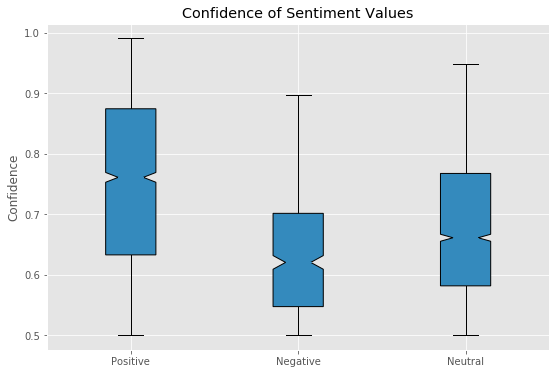

In [425]:
#Boxplot
#df_keto.boxplot('confidence', by="value")
#df_notketo.boxplot('confidence', by='value')

#Maybe the test here is positive versus negative tweets!
neutral_confidence = df_neutral["confidence"]
data_to_plot = [positive_confidence, negative_confidence, neutral_confidence]

fig, ax = plt.subplots(1, figsize=(9,6))
ax.boxplot(data_to_plot, notch=True, patch_artist=True)
    
    
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'])
ax.set_ylabel('Confidence')
ax.set_title("Confidence of Sentiment Values")
fig.savefig('images/Confidence_box_plots.png')

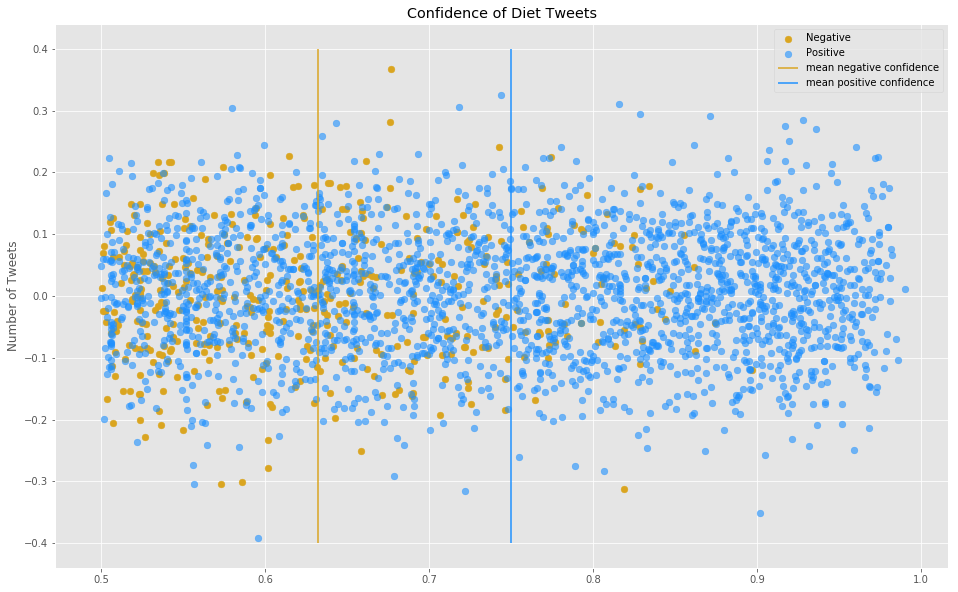

In [444]:
#Histogram of confidence for Positive vs Negative Comments 
fix, ax = plt.subplots(1, figsize=(16,10))

ax.scatter(negative_confidence, np.repeat(0, len(negative_confidence)) + np.random.normal(0, 0.1, len(negative_confidence)), s=45, label = "Negative", color = "goldenrod")
ax.scatter(positive_confidence, np.repeat(0, len(positive_confidence)) + np.random.normal(0, 0.1, len(positive_confidence)), s=45, label = "Positive", color = "dodgerblue", alpha = .6)
ax.vlines(np.mean(negative_confidence), -.4, .4, label = "mean negative confidence", color = "goldenrod")
ax.vlines(np.mean(positive_confidence), -.4, .4, label = "mean positive confidence", color = "dodgerblue")
ax.set_title('Confidence of Diet Tweets')
ax.set_ylabel('Number of Tweets')
ax.legend()

In [ ]:
df_keto.info() 

In [277]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [280]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [452]:
test_statistic = welch_test_statistic(keto_p_confidence, notketo_p_confidence)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

df = welch_satterhwaithe_df(keto_p_confidence, notketo_p_confidence)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

students = stats.t(df)

p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value for different average confidence: {:2.2f}".format(p_value))

p_value = 1 - students.cdf(test_statistic)
print("p-value for positive Keto tweet confidence average greater than other diets: {:2.3f}".format(p_value))

Welch Test Statistic: -3.65
Degrees of Freedom for Welch's Test: 2164.32
p-value for different average confidence: 0.00
p-value for positive Keto tweet confidence average greater than other diets: 1.000


In [453]:
test_statistic = welch_test_statistic(positive_confidence, negative_confidence)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

df = welch_satterhwaithe_df(positive_confidence, negative_confidence)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

students = stats.t(df)

p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value for different average confidence: {:2.2f}".format(p_value))

p_value = 1 - students.cdf(test_statistic)
print("p-value for positive Keto tweet confidence average greater than other diets: {:2.10f}".format(p_value))

Welch Test Statistic: 22.11
Degrees of Freedom for Welch's Test: 923.53
p-value for different average confidence: 2.00
p-value for positive Keto tweet confidence average greater than other diets: 0.0000000000


In [239]:
#T-test - Is there greater confidence in positive tweets from keto diet than others?
# stat, p_val = stats.ttest_ind(df_keto_positive.confidence, df_notketo.confidence, equal_var = False)

# print('The statistic is: {} \nP-value: {}'.format(stat ,p_val))

The statistic is: 4.513107402742417 
P-value: 6.697150561499706e-06


### Try U-Test

In [349]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

In [351]:
positive_wins = count_winning_pairs(positive_confidence, negative_confidence)
negative_wins = count_winning_pairs(negative_confidence, positive_confidence)
print("Number of positive_wins: {}".format(positive_wins))
print("Number of negative_wins: {}".format(negative_wins))

Number of positive_wins: 746834.0
Number of negative_wins: 257917.0


In [354]:
res = stats.mannwhitneyu(positive_confidence, negative_confidence, alternative="greater")
print("p-value for positive > negative: {:2.3f}".format(res.pvalue))

p-value for positive > negative: 0.000


In [456]:
np.mean(keto_p_confidence), np.mean(notketo_p_confidence)

(0.7393569398535125, 0.7609639597916871)

In [457]:
np.mean(positive_confidence), np.mean(negative_confidence)

(0.7497705561325321, 0.6321428709972673)

In [458]:
#positive_confidence

In [459]:
#negative_confidence

### Try turning Keto into a Binomial Distribution

In [461]:
first_quest2.head(1)

,text,confidence,value,keto,paleo,glutenfree,whole30,lowfat,mediterraneandiet
0,,,,,,,,,
1132719428502720513,New Edition of My West Indian Diaspora. https://t.co/XM6pmekz4N Stories via @KellyKatharin @Yana_Yz @Chookooloonks #keto #travelblog,0.774796,neutral,True,False,False,False,False,False


In [464]:
df_keto.head(1)

,text,confidence,value,keto,paleo,glutenfree,whole30,lowfat,mediterraneandiet
0,,,,,,,,,
1132719428502720513,New Edition of My West Indian Diaspora. https://t.co/XM6pmekz4N Stories via @KellyKatharin @Yana_Yz @Chookooloonks #keto #travelblog,0.774796,neutral,True,False,False,False,False,False


In [531]:
df_keto_binomial = df_keto#[(df_keto['value']!='neutral')] 
df_keto_binomial = df_keto_binomial.replace({'value': {'negative': 0, 'positive': 1, 'neutral':0}})

In [534]:
df_notketo_binomial = df_notketo#[(df_notketo['value']!='neutral')] 
df_notketo_binomial = df_notketo_binomial.replace({'value': {'negative': 0, 'positive': 1, 'neutral':0}})

In [532]:
df_keto_binomial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 1132719428502720513 to 1133211053284823043
Data columns (total 9 columns):
text                 3269 non-null object
confidence           3269 non-null float64
value                3269 non-null int64
keto                 3269 non-null bool
paleo                3269 non-null bool
glutenfree           3269 non-null bool
whole30              3269 non-null bool
lowfat               3269 non-null bool
mediterraneandiet    3269 non-null bool
dtypes: bool(6), float64(1), int64(1), object(1)
memory usage: 121.3+ KB


In [533]:
np.sum(df_keto_binomial["value"])

1134

In [536]:
df_notketo_binomial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 1132719555141181440 to 1133211574225833984
Data columns (total 9 columns):
text                 1914 non-null object
confidence           1914 non-null float64
value                1914 non-null int64
keto                 1914 non-null bool
paleo                1914 non-null bool
glutenfree           1914 non-null bool
whole30              1914 non-null bool
lowfat               1914 non-null bool
mediterraneandiet    1914 non-null bool
dtypes: bool(6), float64(1), int64(1), object(1)
memory usage: 71.0+ KB


In [537]:
np.sum(df_notketo_binomial["value"])

1055

### The One Sample Approximate Test of Population Proportion

Text(0.5, 1.0, '# of Keto Positives Under The Null Hypothesis')

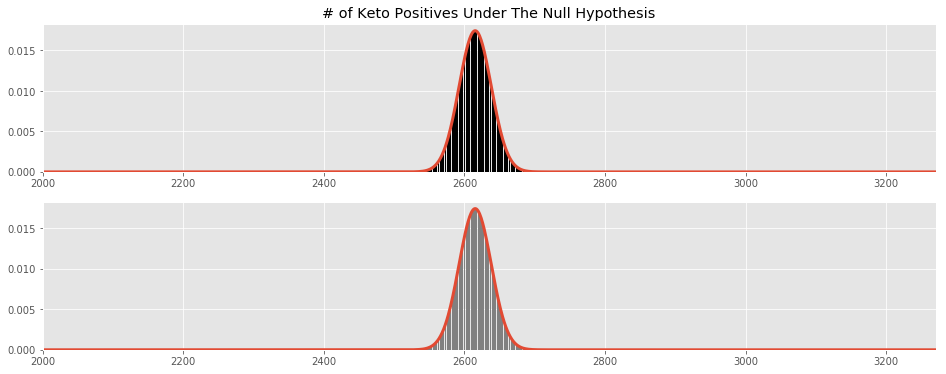

In [539]:
binomial = stats.binom(n=3269, p=0.80)
binomial_mean = 0.8 * 3269
binomial_var = 3269 * 0.8 * 0.2
normal_approx = stats.norm(binomial_mean, np.sqrt(binomial_var))
x = np.linspace(0, 3269, num=3000)

fig, axs = plt.subplots(2, figsize=(16, 6))
bar_sizes = [binomial.pmf(i) for i in range(3270)]
bars = axs[0].bar(range(3270), bar_sizes, color="black", align="center")
axs[0].plot(x, normal_approx.pdf(x), linewidth=3)
axs[0].set_xlim(2000, 3270)

bars = axs[1].bar(range(3270), bar_sizes, color="grey", align="center")
axs[1].plot(x, normal_approx.pdf(x), linewidth=3)
axs[1].set_xlim(2000, 3270)

axs[0].set_title("# of Keto Positives Under The Null Hypothesis")

In [540]:
p_value = 1 - normal_approx.cdf(1134.5)
print("p-value for one month kickflip experiment: {:2.2f}".format(p_value))

p-value for one month kickflip experiment: 1.00


### Two Sample Approximate Test of Population Proportions

In [ ]:
# Keto: 3269, with 1134 positive
# Other: 1914, with 1055 positive
#On a day of skating together, Matt attempts 80 kickflips, landing 58, 
# before hurting his ankle. Nick finishes the full 100, and lands 65.

In [541]:
shared_sample_freq = (1134.0 + 1055.0) / (3269 + 1914)
shared_sample_variance = (3269 + 1914) * (shared_sample_freq * (1 - shared_sample_freq)) / (3269 * 1914)

difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

Text(0.5, 1.0, 'Distribution of Difference in Sample Frequencies Assuming $H_0$')

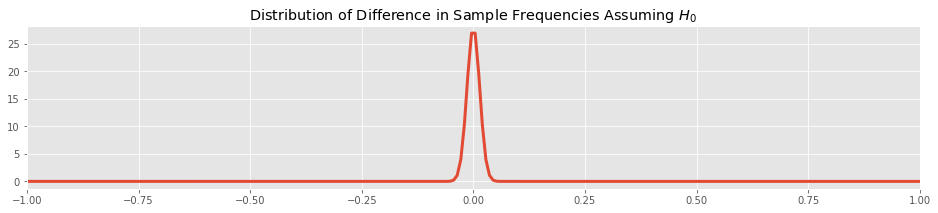

In [542]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-1, 1)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$")

In [543]:
keto_sample_freq = 1134.0 / 3269
other_sample_freq = 1055.0 / 1914
difference_in_sample_proportions = keto_sample_freq - other_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

Difference in sample proportions: -0.20


In [544]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print("p-value for positive frequency comparison: {:2.2f}".format(p_value))

p-value for positive frequency comparison: 1.00


### Actually, let's do this with Gluten-Free!

In [565]:
df_glutenfree_binomial = df_glutenfree#[(df_glutenfree['value']!='neutral')] 
df_glutenfree_binomial = df_glutenfree_binomial.replace({'value': {'negative': 0, 'positive': 1, 'neutral':0}})

In [566]:
df_notglutenfree_binomial = df_notglutenfree#[(df_notglutenfree['value']!='neutral')] 
df_notglutenfree_binomial = df_notglutenfree_binomial.replace({'value': {'negative': 0, 'positive': 1, 'neutral':0}})

In [567]:
df_glutenfree_binomial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 1132720934719229954 to 1133208257487626240
Data columns (total 9 columns):
text                 352 non-null object
confidence           352 non-null float64
value                352 non-null int64
keto                 352 non-null bool
paleo                352 non-null bool
glutenfree           352 non-null bool
whole30              352 non-null bool
lowfat               352 non-null bool
mediterraneandiet    352 non-null bool
dtypes: bool(6), float64(1), int64(1), object(1)
memory usage: 13.1+ KB


In [568]:
np.sum(df_glutenfree_binomial["value"])

263

In [569]:
df_notglutenfree_binomial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4831 entries, 1132719428502720513 to 1133211574225833984
Data columns (total 9 columns):
text                 4831 non-null object
confidence           4831 non-null float64
value                4831 non-null int64
keto                 4831 non-null bool
paleo                4831 non-null bool
glutenfree           4831 non-null bool
whole30              4831 non-null bool
lowfat               4831 non-null bool
mediterraneandiet    4831 non-null bool
dtypes: bool(6), float64(1), int64(1), object(1)
memory usage: 179.3+ KB


In [570]:
np.sum(df_notglutenfree_binomial["value"])

1926

In [ ]:
# gf: 264 (352)entries, 263 positive
# notgf: 2384 (4831) entries, 1926 positive

In [571]:
gf_sample_freq = 263.0 / 352
other_sample_freq = 1926.0 / 4831
difference_in_sample_proportions = gf_sample_freq - other_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

Difference in sample proportions: 0.35


In [574]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print("p-value for positive frequency comparison: {:2.2f}".format(p_value))

p-value for positive frequency comparison: 0.00


In [57]:
# then look at date - more confirmatory than anything
# look at top hashtags for these tweets - could it reveal something else?
# look at top user